In [17]:
import pandas as pd

In [23]:
df = pd.read_csv("diamonds.csv",index_col=0)

In [24]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
df.shape

(53940, 10)

In [26]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [28]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [29]:
df_ohe = pd.get_dummies(df)

In [31]:
df_ohe.shape

(53940, 27)

In [32]:
df_ohe.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [34]:
df_ohe.dtypes

carat            float64
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
cut_Fair           uint8
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_D            uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_I1         uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

Training And Testing split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x = df_ohe

In [39]:
x_train, x_test = train_test_split(x, test_size = 0.3, random_state =7)

In [40]:
x_train.shape, x_test.shape

((37758, 27), (16182, 27))

In [42]:
# Perform KMeans cluster

In [44]:
from sklearn.cluster import KMeans

In [46]:
km = KMeans(n_clusters=3, random_state=7)

In [48]:
#train the model using fit
km.fit(x_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=7)

In [49]:
km.cluster_centers_

array([[1.11073178e+00, 6.18134904e+01, 5.78838563e+01, 5.73534112e+03,
        6.60700959e+00, 6.60374639e+00, 4.08087515e+00, 3.91956056e-02,
        1.11255935e-01, 3.06302951e-01, 2.97923843e-01, 2.45321665e-01,
        1.06787078e-01, 1.32389908e-01, 1.71306210e-01, 2.06032958e-01,
        1.95698725e-01, 1.15445489e-01, 7.23396332e-02, 1.78754306e-02,
        9.03081650e-03, 2.88241318e-01, 2.74369239e-01, 1.27176241e-01,
        2.11805232e-01, 2.27166930e-02, 4.87850293e-02],
       [1.71399901e+00, 6.16236463e+01, 5.78935917e+01, 1.33113440e+04,
        7.63132389e+00, 7.63648783e+00, 4.69582216e+00, 2.73224044e-02,
        7.07898659e-02, 3.41530055e-01, 3.41033284e-01, 2.19324391e-01,
        7.99801292e-02, 1.11276701e-01, 1.57724789e-01, 2.08643815e-01,
        1.90014903e-01, 1.70144064e-01, 8.22155986e-02, 6.70640835e-03,
        3.12965723e-02, 2.23546945e-01, 2.29756582e-01, 1.47540984e-01,
        2.21311475e-01, 4.81867859e-02, 9.16542474e-02],
       [4.91301814e-01

In [50]:
Clust_nos=km.predict(x_test)

In [51]:
Clust_nos

array([2, 0, 0, ..., 2, 2, 2])

In [52]:
len(Clust_nos),x_test.shape

(16182, (16182, 27))

Silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

In [57]:
silhouette_score(x_test, Clust_nos, random_state=7) 
# random state is not compulsory as we are giving whole x_test as input to calculate silhoutte score

0.6628169304076931

In [66]:
silhouette_score(x_test, Clust_nos, random_state=5) 

0.6628169304076931

# Decide best value of k

In [71]:
s_score_dict = {}  
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=7)
    km.fit(x_train)
    #km.cluster_centers_
    Clust_nos=km.predict(x_test)
    
    s=silhouette_score(x_test, Clust_nos, random_state =7)
    s_score_dict[k] = s

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [72]:
s_score_dict

{2: 0.705206889046095,
 3: 0.6628169304076931,
 4: 0.650460243100038,
 5: 0.6209040839557844,
 6: 0.611091683079583,
 7: 0.6137695004944422,
 8: 0.6138354380914478,
 9: 0.6023189782668812,
 10: 0.5965653215131442}

In [90]:
inertia_list = []
sc_list=[]
for k in range(2,11):
   km = KMeans(k,random_state=7)
   km.fit(x_train)
   Cluster_nos = km.predict(x_test)
   inertia_list.append(km.inertia_)
   sc_list.append(silhouette_score(x_test, Cluster_nos))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [91]:
inertia_list

[171597904834.222,
 72428987371.87968,
 39904558737.50992,
 26192836423.97863,
 17680892885.436066,
 12718605013.623104,
 9869348677.149761,
 7716769227.599066,
 6314177003.289935]

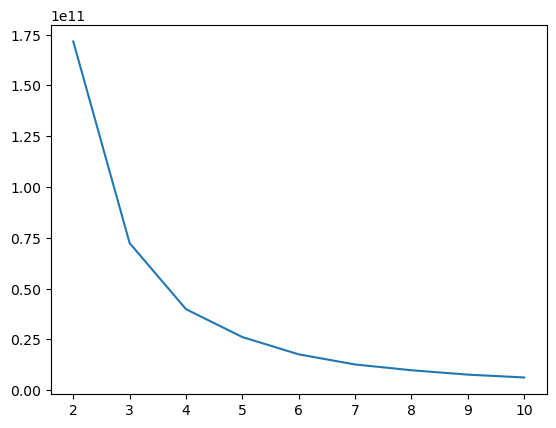

In [92]:
from matplotlib import  pyplot as plt
plt.plot(range(2,11),inertia_list)

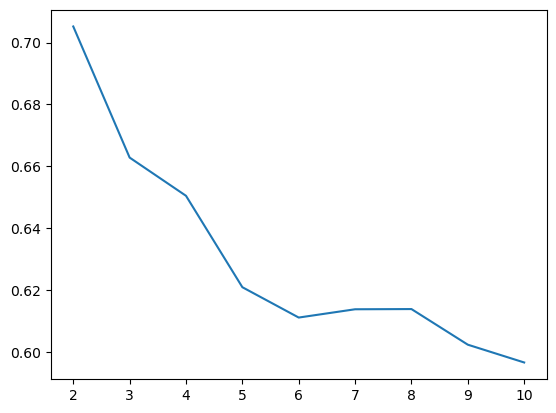

In [93]:
from matplotlib import pyplot as plt
plt.plot(range(2,11), sc_list)

In [9]:
# asd=pd.read_csv("C:/Users/dbda/Downloads/diamonds.csv")

In [11]:
# asd.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [94]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

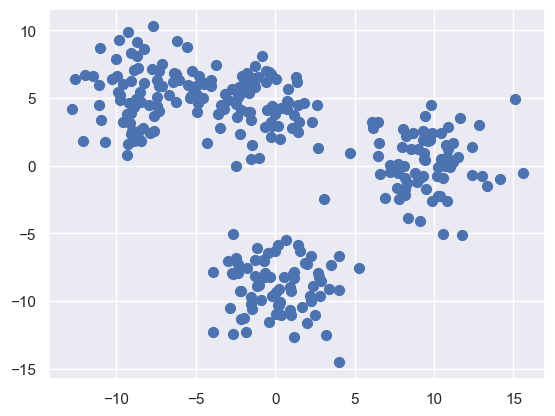

In [104]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, 
                       centers=4,
                       cluster_std=2.1,
                       random_state=7)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [107]:
# write kmeans code here
from sklearn.cluster import KMeans
mykmeans = KMeans(n_clusters = 6,random_state=7)
mykmeans.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=6, random_state=7)

In [108]:
y_kmeans = mykmeans.predict(X)

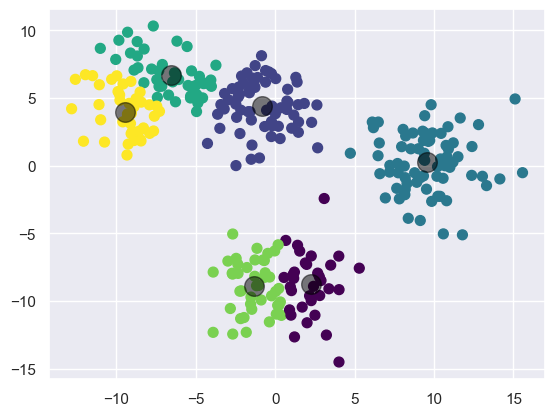

In [109]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = mykmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [110]:
# run kmeans for 5 cluster
from sklearn.cluster import KMeans
mykmeans = KMeans(n_clusters = 5,random_state=7)
mykmeans.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5, random_state=7)

In [111]:
y_kmeans = mykmeans.predict(X)

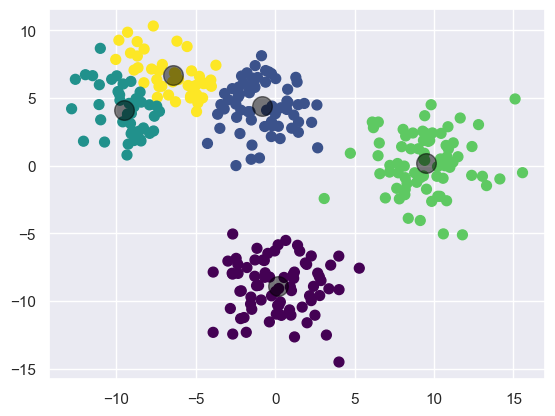

In [112]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = mykmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# DBSCAN

In [114]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # standardization

Number of clusters: 2
Outliers : 0


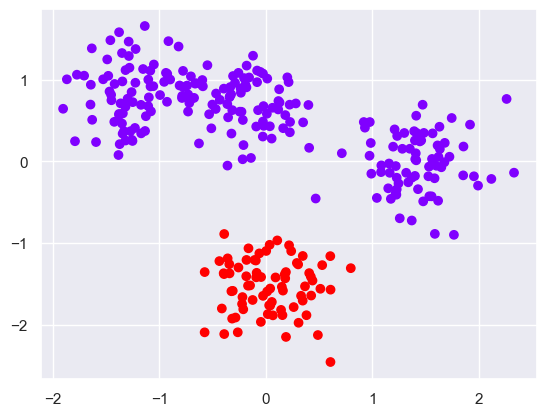

In [136]:
y_pred = DBSCAN(eps=0.58, min_samples=10).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)])))) #-1 is outlier
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# increase eps

Number of clusters: 2
Outliers : 1


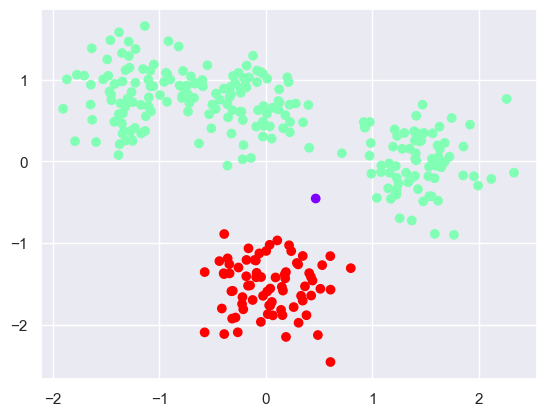

In [146]:
y_pred = DBSCAN(eps=0.57, min_samples=10).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# decrease eps
multiple clusters with high density will be created

outliers may increase

Number of clusters: 1
Outliers : 290


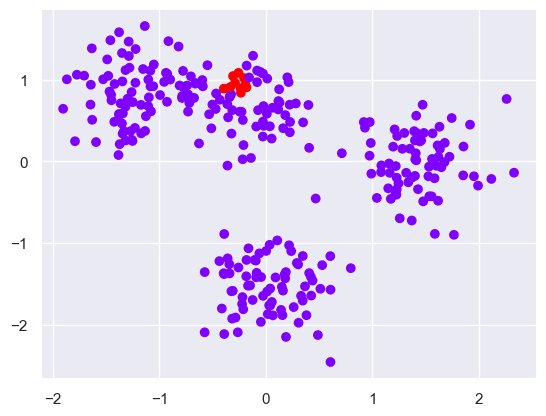

In [176]:
y_pred = DBSCAN(eps=0.1339, min_samples=10).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# increase min_samples
multiple dense clusters are formed

outliers may increase



Number of clusters: 0
Outliers : 300


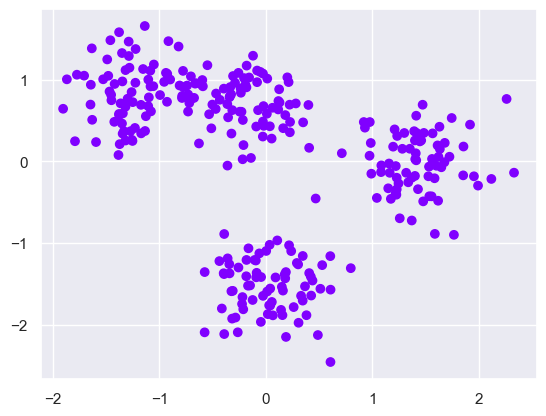

In [210]:
y_pred = DBSCAN(eps=0.3, min_samples=29).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# decrease min_samples
multiple clusters with less density are formed

outliers may reduce

Number of clusters: 3
Outliers : 6


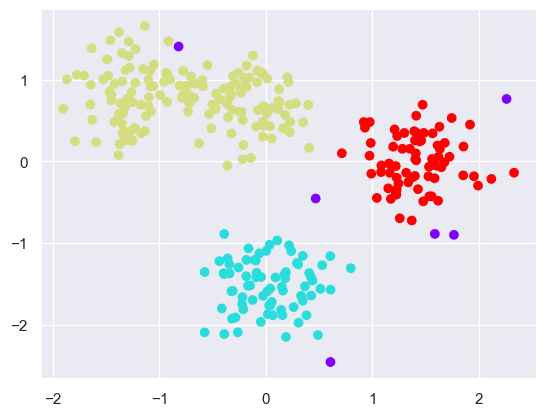

In [149]:
y_pred = DBSCAN(eps=0.3, min_samples=5).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# Knee finding in DBSCAN

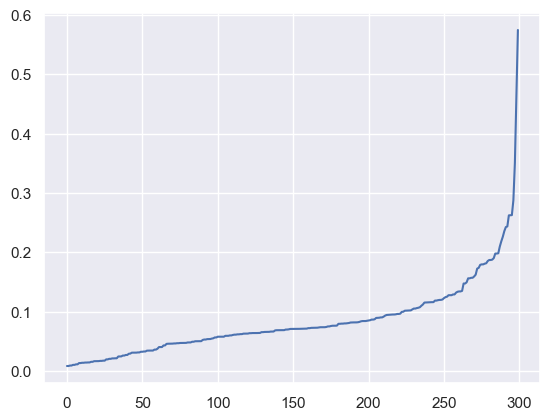

In [211]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# How to say that eps and min_samples is good combination ?
thumb rule :

if no of outliers getting generated are 5% or less

Hierarchical Clustering
draw dendrogram

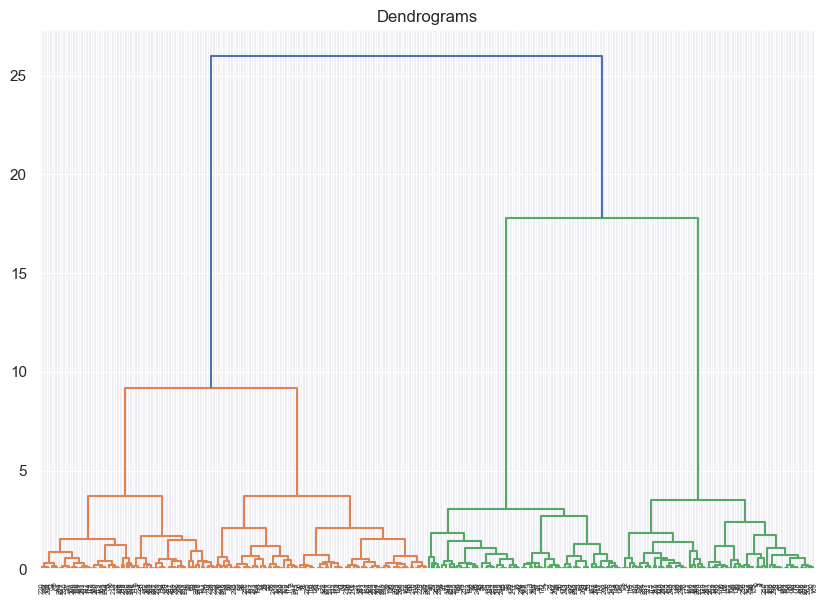

In [218]:
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=50, color='b', linestyle='--')

# Agglomerative Clustering

In [215]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering( n_clusters= 3 , affinity='euclidean', linkage='ward')  
cluster_labels = cluster.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


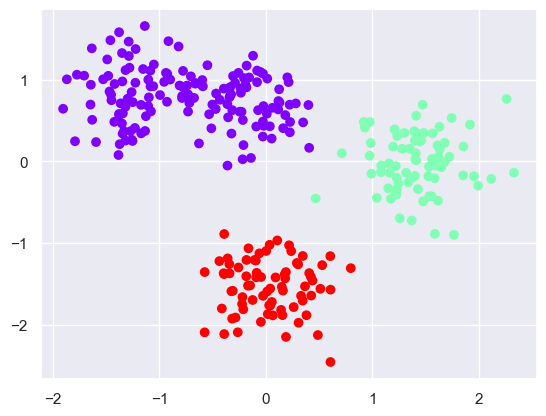

In [216]:
plt.scatter(X[:,0], X[:,1], c=cluster_labels, cmap='rainbow')